# Assignment 5:
### รหัสนักศึกษา: 67130701707
### ชื่อ-นามสกุล: ปลายกันยา พลายวงษ์
### หลักสูตร: SED

## Imbalanced Data Classification & Model Deployment

- Understand the challenges of imbalanced classification.
- Train different models with various resampling techniques.
- Compare model performance using ROC and PR curves.
- Deploy the best-performing model using Streamlit.


#### 1. Install Required Libraries

Ensure you have the necessary libraries installed:

pip install imbalanced-learn scikit-learn matplotlib seaborn streamlit


In [38]:
import pandas as pd
import numpy as np
import imblearn
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## **2. Load and Explore the Dataset**  
Select a dataset from [`imbalanced-learn datasets`](https://imbalanced-learn.org/stable/datasets/index.html). Example: `fetch_datasets` provides multiple datasets.

In [39]:
from collections import Counter
from imblearn.datasets import fetch_datasets
thyroid = fetch_datasets()['sick_euthyroid']
thyroid.data.shape
print(sorted(Counter(thyroid.target).items()))

[(np.int64(-1), 2870), (np.int64(1), 293)]


In [40]:
df = pd.DataFrame(thyroid['data'])
df['target'] = thyroid['target']
df.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,target
0,72.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,83.0,0.0,1.0,0.95,0.0,1.0,87.0,1.0,0.0,1
1,45.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,82.0,0.0,1.0,0.73,0.0,1.0,112.0,1.0,0.0,1
2,64.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,101.0,0.0,1.0,0.82,0.0,1.0,123.0,1.0,0.0,1
3,56.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,76.0,0.0,1.0,0.77,0.0,1.0,99.0,1.0,0.0,1
4,78.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,87.0,0.0,1.0,0.95,0.0,1.0,91.0,1.0,0.0,1


## **3. Train-Test Split**  

In [47]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [48]:
from sklearn. model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split (X,y,test_size=0.3)


## **4. Train Models**  

### **4.1 Baseline Model (Logistic Regression)**

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [59]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.95      0.99      0.97       857
           1       0.88      0.55      0.68        92

    accuracy                           0.95       949
   macro avg       0.92      0.77      0.83       949
weighted avg       0.95      0.95      0.94       949



### **4.2 Model with Undersampling (Logistic Regression)**  

In [54]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))


[(-1, 293), (1, 293)]


In [55]:
logreg_underfift = LogisticRegression()
logreg_underfift .fit(X_resampled, y_resampled)
y_underfit = logreg_underfift .predict(X_test)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
print(classification_report(y_test, y_underfit ))

              precision    recall  f1-score   support

          -1       0.99      0.88      0.93       857
           1       0.45      0.92      0.61        92

    accuracy                           0.88       949
   macro avg       0.72      0.90      0.77       949
weighted avg       0.94      0.88      0.90       949



### **4.3 Model with Oversampling (Logistic Regression)**  

In [ ]:
from imblearn. over_sampling import SMOTE
smote = SMOTE( random_state=42)
X_train_resampled , y_train_resampled = smote.fit_resample (X_train ,y_train)



In [46]:
logreg_overfift = LogisticRegression()
logreg_overfift.fit(X_train_resampled, y_train_resampled)
y_overfit = logreg_overfift.predict(X_test)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
print(classification_report(y_test, y_overfit ))

              precision    recall  f1-score   support

          -1       0.90      0.81      0.86       857
           1       0.10      0.18      0.13        92

    accuracy                           0.75       949
   macro avg       0.50      0.50      0.49       949
weighted avg       0.82      0.75      0.79       949



### **4.4 Random Forest Model (No Resampling)**  

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# ฝึกโมเดล
rf_model.fit(X_train, y_train)

# ทำนายผลลัพธ์บนชุดทดสอบ
y_pred_forest = rf_model.predict(X_test)

In [63]:
print(classification_report(y_test, y_pred_forest ))

              precision    recall  f1-score   support

          -1       0.98      1.00      0.99       857
           1       0.97      0.82      0.89        92

    accuracy                           0.98       949
   macro avg       0.98      0.91      0.94       949
weighted avg       0.98      0.98      0.98       949



## **5. Compare Model Performance**  

### **5.1 Plot ROC Curve & ROC-AUC Score**

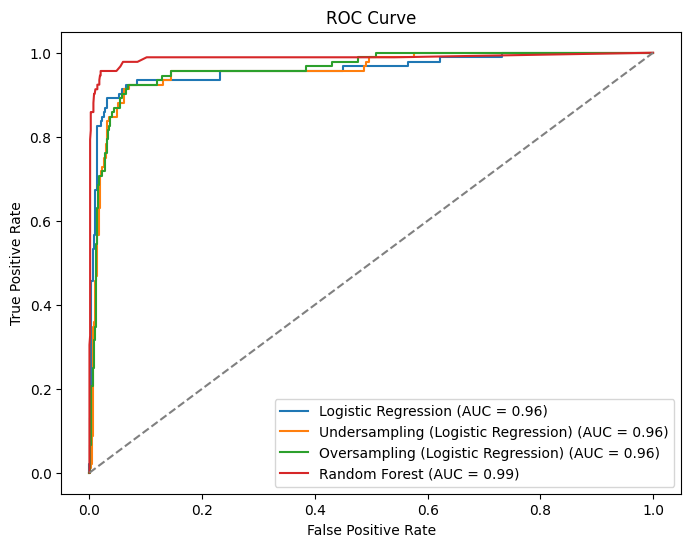

In [65]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": logreg,
    "Undersampling (Logistic Regression)": logreg_underfift,
    "Oversampling (Logistic Regression)": logreg_overfift,
    "Random Forest": rf_model
}

plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()



### **5.2 Plot PR Curve & PR-AUC Score**  

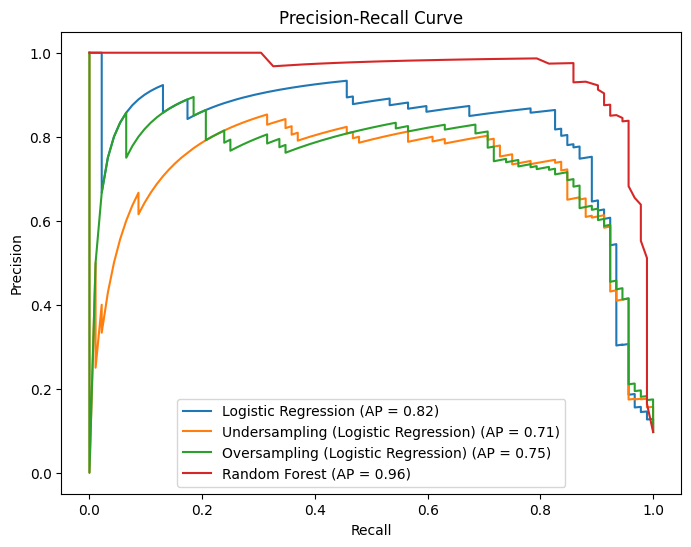

In [66]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob, pos_label=1)
    pr_auc = average_precision_score(y_test, y_prob)
    plt.plot(recall, precision, label=f'{name} (AP = {pr_auc:.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


## **6. Select the Best Model for Deployment**  
Choose the best model based on **ROC-AUC and PR-AUC scores**. Assume **oversampling model** performed best.

### **6.1 Save the Model**  

In [67]:
import joblib

# Save the best model
joblib.dump(rf_model, "best_model.pkl")

['best_model.pkl']

## **7. Deploy Model using Streamlit**  



In [70]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np

# Load model
model = joblib.load("best_model.pkl")

# Streamlit UI
st.title("My first ML App (Study on Imbalanced Data Classification by 67130701707 ")

# Input fields
features = []
for i in range(11):  # Adjust based on dataset
    value = st.number_input(f"Feature_{i}", value=0.0)
    features.append(value)

# Prediction
if st.button("Predict"):
    prediction = model.predict([np.array(features)])
    st.write(f"Predicted Class: {prediction[0]}")


Writing app.py


In [2]:
# %%writefile requirements.txt 



**Insert link of your App here.**